<a href="https://colab.research.google.com/github/Nil1205/PANDAS/blob/main/D1152_NilAtasoy_DAwPy_EDA_Project_(Analyze_US_Citizens).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align: center"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from file

In [19]:
df = pd.read_csv("adult_eda.csv")

# Try to undersstand what the data looks like? What are types of the features? Are there any missing values? Do I need to eliminate some features?  

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
len(df.index), len(df.columns) #df.shape

(32561, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,31759.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.082843,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.576172,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

---
---

# Look at the value counts of columns that have object datatype and replace '?' like values with 'Unknown' word.  

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [7]:
df.select_dtypes("object").describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,27493,32561,32561,32561,32561
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [ ]:
#look at workclass column here
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df["workclass"] = df["workclass"].astype(str).str.replace("\?", "unknown", regex=True)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,?,180211,Some-college,10.0,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4.0,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10.0,Never-married,?,NaN,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6.0,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6.0,Never-married,?,NaN,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13.0,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13.0,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9.0,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [ ]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
#replace all '?' in whole df with 'Unknown'


In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


---
---

# Do education and education_num columns hold similar information? If so drop the appropriate choice between them.

In [ ]:
df.education

0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 32561, dtype: object

In [ ]:
df["education-num"]

0        13.0
1        13.0
2         9.0
3         7.0
4        13.0
         ... 
32556    12.0
32557     9.0
32558     9.0
32559     9.0
32560     9.0
Name: education-num, Length: 32561, dtype: float64

In [8]:
df.groupby("education")["education-num"].value_counts()

education     education-num
10th          6.0                916
11th          7.0               1146
12th          8.0                424
1st-4th       2.0                161
5th-6th       3.0                330
7th-8th       4.0                631
9th           5.0                503
Assoc-acdm    12.0              1044
Assoc-voc     11.0              1343
Bachelors     13.0              5247
Doctorate     16.0               405
HS-grad       9.0              10215
Masters       14.0              1687
Preschool     1.0                 50
Prof-school   15.0               559
Some-college  10.0              7098
Name: education-num, dtype: int64

In [9]:
df["education-num"].value_counts().sort_values(ascending=False)

9.0     10215
10.0     7098
13.0     5247
14.0     1687
11.0     1343
7.0      1146
12.0     1044
6.0       916
4.0       631
15.0      559
5.0       503
8.0       424
16.0      405
3.0       330
2.0       161
1.0        50
Name: education-num, dtype: int64

In [22]:
#drop one of them here
df.drop(columns="education-num", axis=1, inplace=True)


soruyu anlamadım 

In [23]:
df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


In [24]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

---
---

# Take a look at correlation between variables and also see if there are some outliers in any of the columns.

In [25]:
df.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768
capital-gain,0.077674,0.000432,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.078409,0.054256,1.000000


In [26]:
df.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [27]:
q3=df.age.quantile(0.75)
q3

48.0

In [28]:
#age column
IQR=df.age.quantile(0.75)-df.age.quantile(0.25)
IQR

20.0

In [29]:
upper_lim= q3+1.5*IQR
upper_lim

78.0

In [30]:
df[df["age"] >=upper_lim]["age"].value_counts()

90    43
78    23
79    22
80    22
81    20
82    12
84    10
83     6
88     3
85     3
86     1
87     1
Name: age, dtype: int64

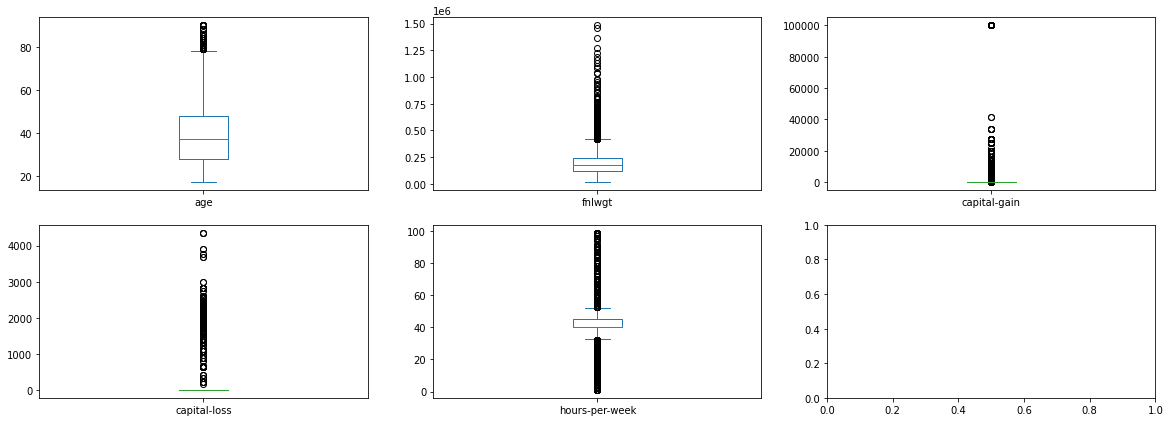

In [31]:
fig ,ax = plt.subplots(2,3,figsize=(20,7))
x = 0
y = 0
for column in df.select_dtypes('number').columns:
    
    df[column].plot(kind = "box", ax = ax[x,y])
    if y < 2:
        y += 1
    else:
        x += 1
        y = 0

In [36]:
df[(df["age"] >= 78)].sample(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
14104,80,Private,148623,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,35,United-States,>50K
28463,90,Federal-gov,195433,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,30,United-States,<=50K
8522,79,Private,333230,HS-grad,Married-spouse-absent,Prof-specialty,Not-in-family,White,Male,0,0,6,United-States,<=50K
19489,90,Private,84553,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
18832,90,Private,115306,Masters,Never-married,Exec-managerial,NaN,White,Female,0,0,40,United-States,<=50K
4109,90,?,256514,Bachelors,Widowed,?,Other-relative,White,Female,991,0,10,United-States,<=50K
31836,80,?,281768,Assoc-acdm,Married-civ-spouse,?,Husband,White,Male,0,0,4,United-States,<=50K
6439,80,Private,249983,7th-8th,Widowed,Other-service,Not-in-family,White,Female,0,0,24,United-States,<=50K
2754,80,Self-emp-not-inc,184335,7th-8th,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,30,United-States,<=50K
26242,79,Self-emp-inc,183686,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,0,0,20,United-States,>50K


In [32]:
df[(df["hours-per-week"] == 99)].sample(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
31699,43,Self-emp-not-inc,163108,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K
4308,35,Self-emp-not-inc,166416,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K
22720,39,Private,237713,Prof-school,Married-civ-spouse,Sales,Husband,White,Male,0,2415,99,United-States,>50K
24483,39,Self-emp-inc,124685,Masters,Divorced,Exec-managerial,Not-in-family,Asian-Pac-Islander,Male,0,0,99,Japan,>50K
23179,31,Private,511289,HS-grad,Never-married,Farming-fishing,Not-in-family,White,Male,2907,0,99,United-States,<=50K
18881,43,Private,249771,HS-grad,Married-civ-spouse,Transport-moving,Husband,Asian-Pac-Islander,Male,0,0,99,United-States,<=50K
18603,33,Self-emp-not-inc,67482,Assoc-voc,Divorced,Other-service,Unmarried,White,Female,0,0,99,United-States,<=50K
31681,43,Private,266324,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,99,United-States,>50K
25806,49,?,31478,7th-8th,Married-civ-spouse,?,Husband,White,Male,0,0,99,United-States,<=50K
23226,51,Self-emp-not-inc,88528,Assoc-acdm,Divorced,Exec-managerial,Unmarried,White,Female,0,0,99,United-States,<=50K


In [37]:
q3_h=df["hours-per-week"].quantile(0.75)
q3_h

45.0

In [38]:
q1_h=df["hours-per-week"].quantile(0.25)
q1_h

40.0

In [39]:
#hours per week column
IQR_h=q3_h-q1_h
IQR_h

5.0

In [40]:
upper_lim_h=q3_h+1.5*IQR_h
upper_lim_h

52.5

In [ ]:
# find outlier values which extends the upper limit in both age and hours-per-week columns

In [ ]:
not_outliers =(df.age >= upper_lim)


In [ ]:
df[not_outliers].sample(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7481,83,Private,195507,HS-grad,Widowed,Protective-serv,Not-in-family,White,Male,0,0,55,United-States,<=50K
24043,90,Self-emp-not-inc,82628,HS-grad,Never-married,Exec-managerial,Not-in-family,White,Male,2964,0,12,United-States,<=50K
9735,78,Private,180239,Masters,Widowed,Craft-repair,Unmarried,Asian-Pac-Islander,Male,0,0,40,South,<=50K
5370,90,Local-gov,227796,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K
20483,79,Local-gov,146244,Doctorate,Widowed,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K
18141,79,Self-emp-not-inc,84979,Assoc-voc,Married-civ-spouse,Sales,Husband,White,Male,0,0,20,United-States,>50K
24238,90,unknown,166343,1st-4th,Widowed,?,Not-in-family,Black,Female,0,0,40,United-States,<=50K
11512,90,Private,87285,HS-grad,Never-married,Other-service,NaN,White,Female,0,0,24,United-States,<=50K
21516,78,unknown,292019,7th-8th,Married-civ-spouse,?,Husband,White,Male,0,0,20,United-States,<=50K
13696,82,Self-emp-not-inc,240491,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Cuba,<=50K


In [ ]:
not_outliers_h =(df["hours-per-week"] >= upper_lim_h)

In [ ]:
df[not_outliers_h].sample(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
17117,35,Private,209609,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,<=50K
18396,49,Self-emp-not-inc,208872,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,1672,98,United-States,<=50K
14917,35,Private,113481,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,<=50K
26625,67,Self-emp-not-inc,152102,HS-grad,Widowed,Farming-fishing,Not-in-family,White,Male,0,0,65,United-States,<=50K
2422,29,Private,121523,11th,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,<=50K
23106,54,Self-emp-inc,162439,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,98,United-States,>50K
28366,30,Private,206322,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,73,United-States,>50K
20164,53,Private,375134,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
20477,34,Private,213226,Bachelors,Never-married,Sales,Not-in-family,White,Male,0,0,65,United-States,>50K
2994,35,Self-emp-not-inc,361888,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,Japan,<=50K


# After looking at the outliers you can drop the rows which actually does not make any sense. 
** Hint: You can check age and hours per week columns. **

In [ ]:
drop_index=df.loc[(df["age"]>=upper_lim)|(df["hours-per-week"]>=upper_lim_h)].index
drop_index

Int64Index([   10,    20,    27,    28,    52,    53,    54,    64,    72,
               74,
            ...
            32500, 32506, 32520, 32523, 32525, 32530, 32531, 32532, 32536,
            32548],
           dtype='int64', length=3648)

In [ ]:
df.drop(drop_index, inplace=True)

In [ ]:
# check outlier values which extends the upper limit in both age and hours-per-week columns

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


In [ ]:
df.sample(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
17099,23,Private,151888,Some-college,Never-married,Sales,NaN,White,Male,0,0,40,United-States,<=50K
459,32,unknown,115745,Some-college,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
5056,26,Private,330695,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
16718,20,Private,161092,Some-college,Never-married,Handlers-cleaners,NaN,White,Male,0,0,40,United-States,<=50K
3902,22,unknown,131230,Some-college,Never-married,?,NaN,White,Male,0,0,40,United-States,<=50K
12024,67,Private,64148,Some-college,Divorced,Other-service,Unmarried,Black,Female,0,0,41,United-States,<=50K
17646,41,Private,237452,Bachelors,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,15,Cuba,>50K
32313,41,Private,144460,Some-college,Divorced,Machine-op-inspct,NaN,White,Male,0,0,40,Italy,<=50K
10993,23,Private,117583,HS-grad,Never-married,Craft-repair,NaN,White,Male,0,0,40,United-States,<=50K
10181,43,Private,108945,Some-college,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,<=50K


# Impute missing values in relationship column with 'Unmarried'. Also replace 'Not-in-family','Other-relative' values in this column with 'Unmarried'?

In [ ]:
df["relationship"]=df["relationship"].fillna("Unmarried")

In [ ]:
df["relationship"].value_counts()

Husband           10987
Unmarried          8087
Not-in-family      7421
Wife               1487
Other-relative      931
Name: relationship, dtype: int64

In [ ]:
df["relationship"]=df["relationship"].replace("Other-relative", "Unmarried")

In [ ]:
df["relationship"]=df["relationship"].replace("Not-in-family", "Unmarried")

In [ ]:
df.relationship.value_counts()

Unmarried    16439
Husband      10987
Wife          1487
Name: relationship, dtype: int64

---
# How many of each race are represented in this dataset?
---

In [ ]:
race_count=df.race.value_counts()
race_count

White                 24501
Black                  2959
Asian-Pac-Islander      924
Amer-Indian-Eskimo      278
Other                   251
Name: race, dtype: int64

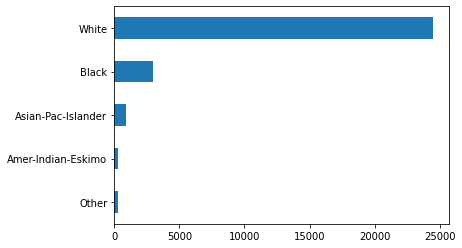

In [ ]:
race_count.sort_values().plot.barh();

---
# What is the average age of men/women?
---

In [42]:
average_age_men =df.loc[df["sex"]=="Male","age"].mean()
average_age_men 

39.43354749885268

In [ ]:
# average_age_men=df.groupby("sex")["age"].mean()[1]  ( niye farklı sonuç verdi anlamadım??????)
# average_age_men

38.990811474971956

In [43]:
round(average_age_men,1)

39.4

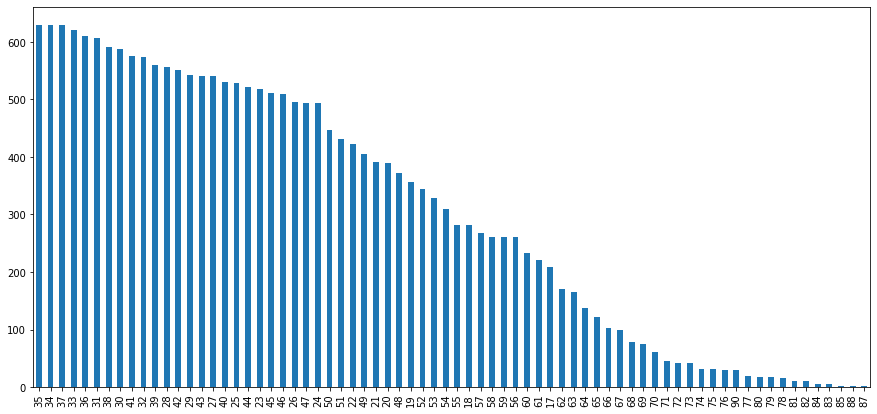

In [44]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Male", "age"].value_counts().plot.bar();

In [46]:
average_age_women=df.loc[df["sex"]=="Female","age"].mean()
average_age_women

36.85823043357163

In [47]:
round(average_age_women,1)

36.9

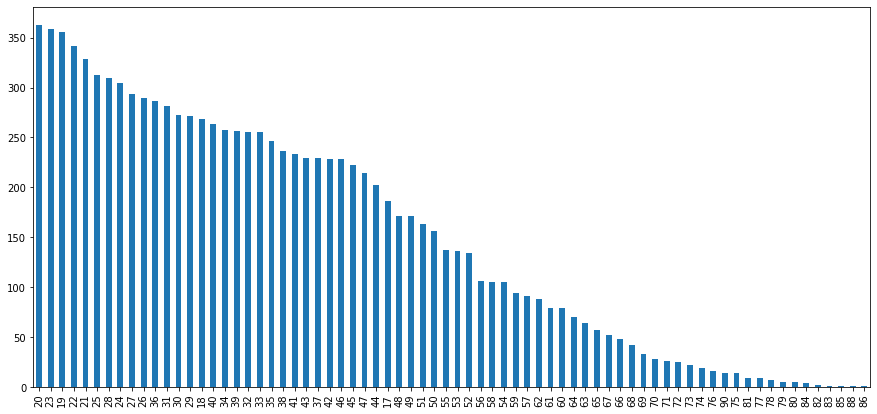

In [48]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Female", "age"].value_counts().plot.bar();

---
# What is the percentage of people who have a Bachelor's degree?
---

In [50]:
df.groupby("education")["education"].count()

education
10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           646
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5355
Doctorate         413
HS-grad         10501
Masters          1723
Preschool          51
Prof-school       576
Some-college     7291
Name: education, dtype: int64

In [51]:
df["education"].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [52]:
upper=df.groupby("education").education.count().loc["Bachelors"]
upper

5355

In [53]:
lower=df.groupby("education").education.count().sum()
lower

32561

In [54]:
percentage_bachelors = (upper/lower) * 100

percentage_bachelors

16.44605509658794

In [55]:
df["education"].value_counts(normalize=True)

HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64

In [56]:
percentage_bachelors = df["education"].value_counts(normalize=True).loc["Bachelors"]*100
round(percentage_bachelors,1)

16.4

In [57]:
print(f"The percentage of people who have a Bachelor's degree : %{round(percentage_bachelors,1)}")

The percentage of people who have a Bachelor's degree : %16.4


---
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
---

In [58]:
df["salary"].value_counts()

<=50K    24720
>50K      7841
Name: salary, dtype: int64

In [59]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [60]:
higher_education = df["education"].isin(["Bachelors", "Masters", "Doctorate"])
higher_education
#higher_education = (df["education"] == "Bachelors")|(df["education"] == "Masters")|(df["education"] == "Doctorate")
#higher_education

0         True
1         True
2        False
3        False
4         True
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education, Length: 32561, dtype: bool

In [61]:
df_high_edu =df[(df["education"].isin(["Bachelors", "Masters", "Doctorate"]))]
df_high_edu 

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,?,287372,Doctorate,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32544,31,Private,199655,Masters,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32553,32,Private,116138,Masters,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


In [62]:
df_high_edu["salary"]==">50K"

0        False
1        False
4        False
5        False
8         True
         ...  
32538     True
32539     True
32544    False
32553    False
32554     True
Name: salary, Length: 7491, dtype: bool

In [63]:
df_high_edu[df_high_edu["salary"]==">50K"]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
8,31,Private,45781,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
19,43,Self-emp-not-inc,292175,Masters,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
20,40,Private,193524,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,54,Private,337992,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32536,34,Private,160216,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,?,287372,Doctorate,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K


In [64]:
count =df_high_edu[df_high_edu["salary"] == ">50K"].education.count()
shape = df_high_edu[df_high_edu["salary"] == ">50K"].shape[0]

In [66]:
perc_high_edu = count / df["education"].size    

In [67]:
perc_high_edu

0.10706059396210191

In [68]:
print(f"Percentage of people with advanced education make more than 50K : {round(perc_high_edu * 100, 2)}")

Percentage of people with advanced education make more than 50K : 10.71


---
# What percentage of people without advanced education make more than 50K?
---

In [69]:
lower_education = ~higher_education
#(~df["education"].isin(["Bachelors", "Masters", "Doctorate"]))

In [70]:
df_low_edu = df[lower_education]
df_low_edu

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


In [71]:
df_low_edu[df_low_edu["salary"] == ">50K"]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
14,40,Private,121772,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32518,57,Local-gov,110417,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
32519,46,Private,364548,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [73]:
count =df_low_edu[df_low_edu["salary"] == ">50K"].education.count()
count

4355

In [75]:
tot=len(df.education.index)

In [77]:
perc_low_edu = count / df["education"].size  

In [78]:
print(f"Percentage of people without advanced education make more than 50K : {round(perc_low_edu * 100 ,2)}")

Percentage of people without advanced education make more than 50K : 13.37


In [79]:
if perc_high_edu > perc_low_edu :
    print("More education more money!")
else:
    print("Education has no clear effet on salary. You should investigate some other features also.")

Education has no clear effet on salary. You should investigate some other features also.


---
# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
---

In [80]:
df["hours-per-week"].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours-per-week, Length: 94, dtype: int64

In [90]:
lazy_riches = (df["hours-per-week"] == df["hours-per-week"].min())&(df["salary"] == ">50K")
lazy_riches

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [88]:
#lazy_riches = [(df["salary"] == ">50K") & (df["hours-per-week"]==df["hours-per-week"].min())]
#lazy_riches        (böyle yazınca df[lazy_riches] çalışmadı neden anlamadım)

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 32556    False
 32557    False
 32558    False
 32559    False
 32560    False
 Length: 32561, dtype: bool]

In [91]:
df[lazy_riches]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
20072,65,?,76043,HS-grad,Married-civ-spouse,?,Husband,White,Male,0,0,1,United-States,>50K


In [92]:
num_lazy_riches = len(df[lazy_riches]) 
num_lazy_riches

2

In [93]:
#len(df[lazy_riches].index)

2

In [ ]:
#df[lazy_riches].shape[0]

In [97]:
num_min_workers =len(df[(df["hours-per-week"] == df["hours-per-week"].min())])
num_min_workers 
#df[(df["hours-per-week"] == df["hours-per-week"].min())].shape[0]

20

In [98]:
print (f"Percentage of the people who work the minimum number of hours per week have a salary of >50K : % {round(num_lazy_riches/num_min_workers*100)}")

Percentage of the people who work the minimum number of hours per week have a salary of >50K : % 10


hocam sonuçlarım baştan beri yanlış geldiği için kesişimim boş küme çıktı ama olması gereken formulleri yazdım yinede.

 ---
 # What country has the highest percentage of people that earn >50K?
 ---


In [99]:
country_salary_df =df.groupby("native-country")[["salary"]].count()
country_salary_df 

,salary
native-country,
?,583
Cambodia,19
Canada,121
China,75
Columbia,59
Cuba,95
Dominican-Republic,70
Ecuador,28
El-Salvador,106


In [100]:
country_salary_df_riches = df[df["salary"] == ">50K"].groupby(by=["native-country",])[["salary"]].count()
country_salary_df_riches

,salary
native-country,
?,146
Cambodia,7
Canada,39
China,20
Columbia,2
Cuba,25
Dominican-Republic,2
Ecuador,4
El-Salvador,9


In [101]:
rich_per_country =( country_salary_df_riches / country_salary_df ).sort_values("salary",ascending=True)
rich_per_country

,salary
native-country,
Dominican-Republic,0.028571
Columbia,0.033898
Guatemala,0.046875
Mexico,0.051322
Nicaragua,0.058824
Peru,0.064516
Vietnam,0.074627
Honduras,0.076923
El-Salvador,0.084906


In [102]:
rich_per_country[rich_per_country["salary"] == rich_per_country["salary"].max()]

,salary
native-country,
Iran,0.418605


In [103]:
#use iloc here
rich_per_country.sort_values("salary",ascending=False).iloc[[0]]

,salary
native-country,
Iran,0.418605


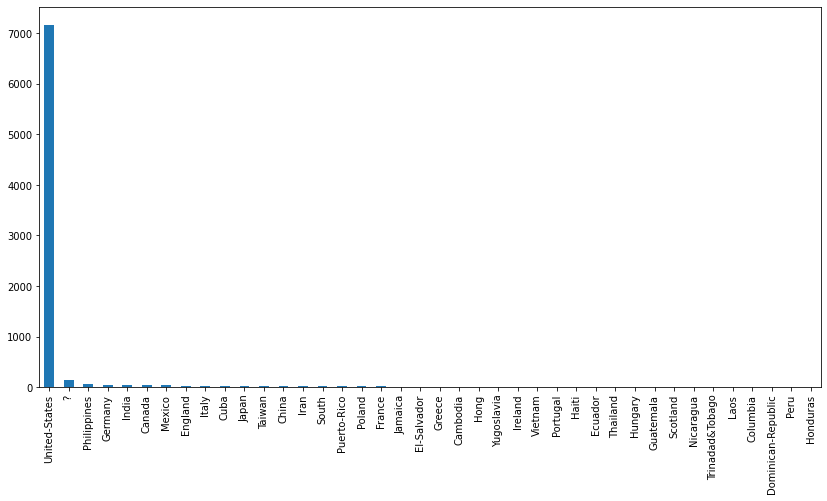

In [104]:
plt.figure(figsize=(14,7))
df.loc[df["salary"] == ">50K", "native-country"].value_counts().plot(kind="bar");

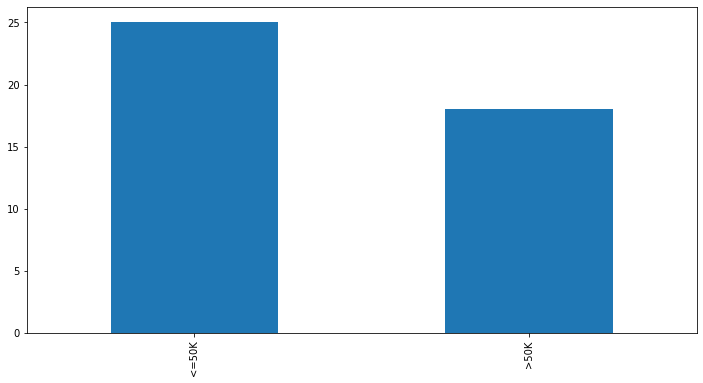

In [105]:
plt.figure(figsize=(12,6))
df.loc[((df["native-country"] == "Iran")), "salary"].value_counts().plot.bar();

---
# Identify the most popular occupation for those who earn >50K in India.
---

In [ ]:
top_IN_occupation=[(df["native-country"]=="India")&(df["salary"] ==">50K")]
top_IN_occupation

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 32556    False
 32557    False
 32558    False
 32559    False
 32560    False
 Length: 28913, dtype: bool]

In [106]:
df[(df["native-country"]=="India")&(df["salary"] ==">50K")]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
968,48,Private,164966,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
1327,52,Private,168381,HS-grad,Widowed,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,40,India,>50K
7258,42,State-gov,102343,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,72,India,>50K
7285,54,State-gov,93449,Masters,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
8124,36,Private,172104,Prof-school,Never-married,Prof-specialty,Not-in-family,Other,Male,0,0,40,India,>50K
9939,43,Federal-gov,325706,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,50,India,>50K
10590,35,Private,98283,Prof-school,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,0,0,40,India,>50K
10661,59,Private,122283,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,99999,0,40,India,>50K
10736,30,Private,243190,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,20,India,>50K


In [107]:
oc_list=df[(df["native-country"]=="India")&(df["salary"] ==">50K")]["occupation"].value_counts()
oc_list

Prof-specialty      25
Exec-managerial      8
Other-service        2
Tech-support         2
Transport-moving     1
Sales                1
Adm-clerical         1
Name: occupation, dtype: int64

In [120]:
df[(df["native-country"]=="India")&(df["salary"] ==">50K")]["occupation"].value_counts().index[0]

'Prof-specialty'

In [121]:
a=df[(df["native-country"]=="India")&(df["salary"] ==">50K")]["occupation"].mode()[0]
a

'Prof-specialty'

In [122]:
print(f"{a} the most popular occupation for those who earn >50K in India.")

Prof-specialty the most popular occupation for those who earn >50K in India.


----
---